# 3.2 Datengenerierung und Analyse des Goldstandards 

## 1. Bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from pathlib import Path
import glob
import os

## 2. Goldstandard-Dataset

##### zur Verfügung gestellt durch das FWF-Forschungsprojekt "The making of the incredibly differentiated labor market: Evidence from job offers from ten decades"
Mit Hilfe von Transkribus wurde ein Teil der Stellenanzeigen im ANNO-Korpus manuell transkribiert. Die Arbeiter-Zeitung und Das Vaterland wurden in Gänze transkribiert.
Diese txt-files werden im Folgenden nun eingelesen und in einen Dataframe gespeichert. Ebenso können bereits weitere Informationen aus dem filename extrahiert werden.

### 2.1. Text Import

In [2]:
#create dataframe from text files (transkribus files)
## read every file from the ground_truth txt folder into a dataframe and save the filename as id

file_list = glob.glob(os.path.join(os.getcwd(), "../input/ground_truth/txt", "*.txt"))

ad = []
files = []

for file_path in file_list:
    with open(file_path, encoding="utf-8") as f_input:
        ad.append(f_input.read())
        files.append(''.join([n for n in os.path.basename(file_path)]))

df_text = pd.DataFrame({'identifier':files, 'ground_truth_text':ad})

df_text['identifier'] = df_text['identifier'].str.rstrip('.txt')



df_text.head()

,identifier,ground_truth_text
0,aze_19171111_11_OFFER_78,Kartonnagenarbeiterinnen\nwerden gegen hohen L...
1,aze_19180616_11_OFFER_89,Hilfsarbeiterinnen\nwerden bei hohem Lohn aufg...
2,aze_19130831_15_HEADING_37,Arbeitsmarkt\n
3,aze_19171111_11_OFFER_44,Maschinnäherinnen\nfinden dauernde Beschäftigu...
4,aze_19141018_16_OFFER_23,"Kunststopfer\nSchneider, tüchtig, findet lohne..."


### 2.2.  Erstellung des intialen Datensets
#### Anreicherung des Dataframes mit allen Metadaten, die sich im Identifier verstecken

In [3]:
# add the date
search = []    
for values in df_text['identifier']:
    search.append(re.search(r'\d\d\d\d', values).group())
df_text['date'] = search
df_text = df_text.astype({'date': int})
df_text.head()

,identifier,ground_truth_text,date
0,aze_19171111_11_OFFER_78,Kartonnagenarbeiterinnen\nwerden gegen hohen L...,1917
1,aze_19180616_11_OFFER_89,Hilfsarbeiterinnen\nwerden bei hohem Lohn aufg...,1918
2,aze_19130831_15_HEADING_37,Arbeitsmarkt\n,1913
3,aze_19171111_11_OFFER_44,Maschinnäherinnen\nfinden dauernde Beschäftigu...,1917
4,aze_19141018_16_OFFER_23,"Kunststopfer\nSchneider, tüchtig, findet lohne...",1914


In [4]:
# add type
search = []    
for values in df_text['identifier']:
    search.append(re.search(r'[A-Z]+', values).group())

df_text['region_class'] = search
df_text = df_text.astype({'region_class': str})
df_text.head()

,identifier,ground_truth_text,date,region_class
0,aze_19171111_11_OFFER_78,Kartonnagenarbeiterinnen\nwerden gegen hohen L...,1917,OFFER
1,aze_19180616_11_OFFER_89,Hilfsarbeiterinnen\nwerden bei hohem Lohn aufg...,1918,OFFER
2,aze_19130831_15_HEADING_37,Arbeitsmarkt\n,1913,HEADING
3,aze_19171111_11_OFFER_44,Maschinnäherinnen\nfinden dauernde Beschäftigu...,1917,OFFER
4,aze_19141018_16_OFFER_23,"Kunststopfer\nSchneider, tüchtig, findet lohne...",1914,OFFER


In [5]:
# add paper 
search = []    
for values in df_text['identifier']:
    search.append(re.search(r'^[a-z]+', values).group())

df_text['pub_id'] = search
df_text = df_text.astype({'pub_id': str})
df_text.head()

,identifier,ground_truth_text,date,region_class,pub_id
0,aze_19171111_11_OFFER_78,Kartonnagenarbeiterinnen\nwerden gegen hohen L...,1917,OFFER,aze
1,aze_19180616_11_OFFER_89,Hilfsarbeiterinnen\nwerden bei hohem Lohn aufg...,1918,OFFER,aze
2,aze_19130831_15_HEADING_37,Arbeitsmarkt\n,1913,HEADING,aze
3,aze_19171111_11_OFFER_44,Maschinnäherinnen\nfinden dauernde Beschäftigu...,1917,OFFER,aze
4,aze_19141018_16_OFFER_23,"Kunststopfer\nSchneider, tüchtig, findet lohne...",1914,OFFER,aze


In [6]:
# create new column pub_name by copying the column "pub_id"

df_text["pub_name"] = df_text["pub_id"]
df_text.loc[df_text["pub_name"] == "aze", "pub_name"] = "Arbeiter-Zeitung"
df_text.loc[df_text["pub_name"] == "vtl", "pub_name"] = "Das Vaterland"

#### "Heading" aus dem Dataframe entfernen

Reine Überschriften werden keine strukturellen Kategorien enthalten und müssen entfernt werden

<AxesSubplot:>

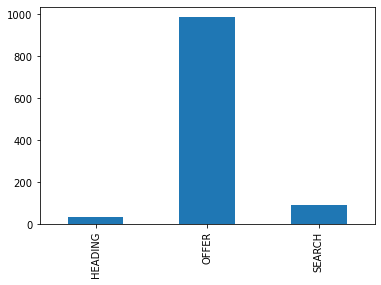

In [7]:
df_type = df_text["region_class"]
df_type.value_counts().sort_index().plot(kind='bar')

In [8]:
#offer and search; we don't need Headings
df_ground_truth = df_text[df_text.region_class != "HEADING"]

In [9]:
print(len(df_text))

1117


In [10]:
print(len(df_ground_truth))

1081


##### Export des intialen Goldstandard Datenset

In [11]:
#export df_ground_truth with all the information of this notebook

df_ground_truth.to_csv('../output/3.2_korpus_analysen_ground_truth/ground_truth.csv', index=False)

In [12]:
df_ground_truth.head()

,identifier,ground_truth_text,date,region_class,pub_id,pub_name
0,aze_19171111_11_OFFER_78,Kartonnagenarbeiterinnen\nwerden gegen hohen L...,1917,OFFER,aze,Arbeiter-Zeitung
1,aze_19180616_11_OFFER_89,Hilfsarbeiterinnen\nwerden bei hohem Lohn aufg...,1918,OFFER,aze,Arbeiter-Zeitung
3,aze_19171111_11_OFFER_44,Maschinnäherinnen\nfinden dauernde Beschäftigu...,1917,OFFER,aze,Arbeiter-Zeitung
4,aze_19141018_16_OFFER_23,"Kunststopfer\nSchneider, tüchtig, findet lohne...",1914,OFFER,aze,Arbeiter-Zeitung
5,aze_18970516_21_OFFER_2,Schuhmacher\nwerden zur Besohlung feiner Damen...,1897,OFFER,aze,Arbeiter-Zeitung


##### Leere Spalten im Korpus ( "ground_truth_text" )?

Check, ob manche Spalten aus Versehen keinen Text enthalten. 

In [13]:
df_ground_truth_nan = df_ground_truth[df_ground_truth['ground_truth_text'].isna()]
len(df_ground_truth_nan)

0

es sind keine leeren Zeilen ohne Transkript vorhanden

## 3. Analysen

### 3.1. Verteilung der Anzeigen zwischen Stellengesuch (Search) und Stellenangeboten (Offer) 

<AxesSubplot:xlabel='Kategorie der Anzeige', ylabel='Anzahl der Anzeigen je Kategorie'>

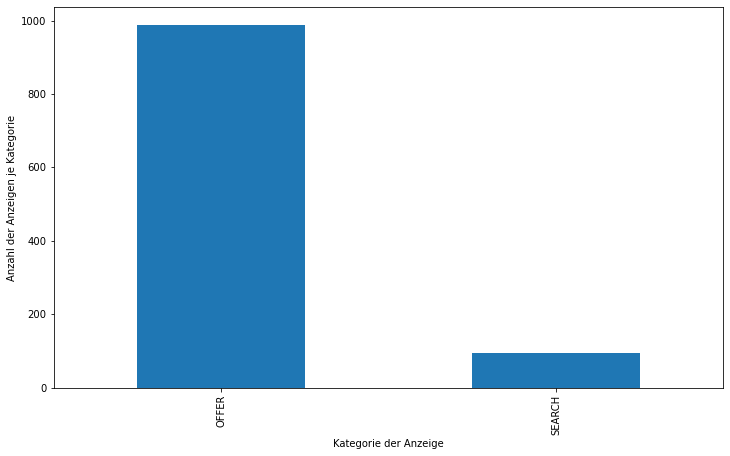

In [14]:
# Visualization of news region_class and article count in the dataset 

plt.figure(figsize=(12,7))

plt.xlabel("Kategorie der Anzeige")
plt.ylabel("Anzahl der Anzeigen je Kategorie")

df_ground_truth.region_class.value_counts().plot(kind='bar')

Es muss kurz gecheckt werden, ob die Zeitungen jeweils Stellengebote und Stellengesuche beinhalten

#### Verteilung Stellengebote und Stellengesuche Arbeiter-Zeitung

<AxesSubplot:xlabel='Kategorie der Anzeige', ylabel='Anzahl der Anzeigen je Kategorie'>

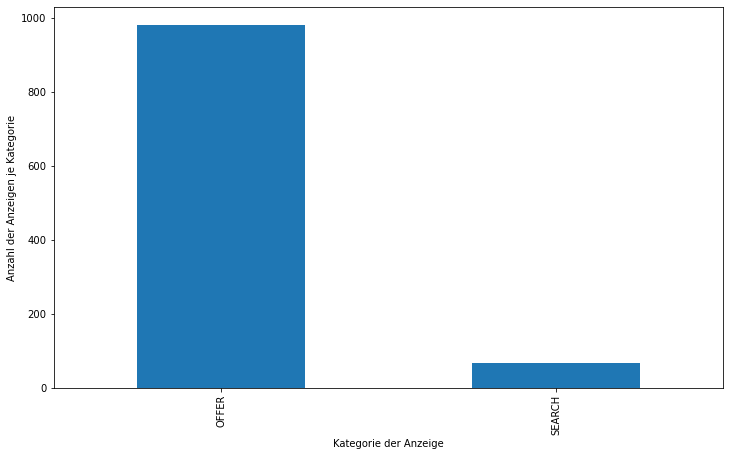

In [15]:
df_aze = df_ground_truth[df_ground_truth.pub_id == "aze"]

plt.figure(figsize=(12,7))

plt.xlabel("Kategorie der Anzeige")
plt.ylabel("Anzahl der Anzeigen je Kategorie")

df_aze.region_class.value_counts().plot(kind='bar')

#### Verteilung Stellengebote und Stellengesuche Das Vaterland

<AxesSubplot:xlabel='Kategorie der Anzeige', ylabel='Anzahl der Anzeigen je Kategorie'>

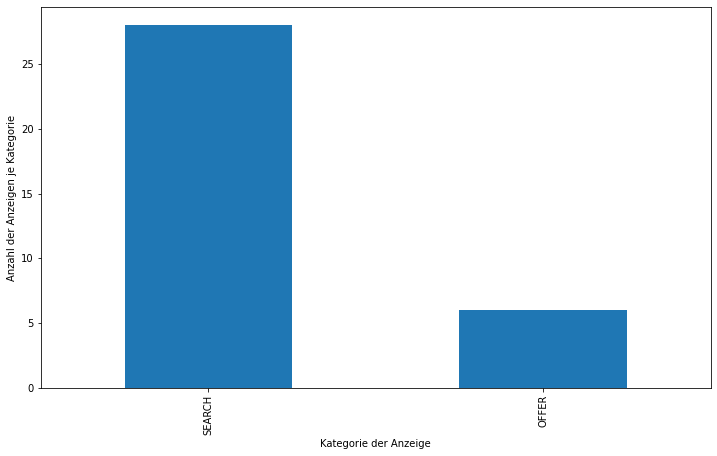

In [16]:
df_vtl = df_ground_truth[df_ground_truth.pub_id == "vtl"]

plt.figure(figsize=(12,7))

plt.xlabel("Kategorie der Anzeige")
plt.ylabel("Anzahl der Anzeigen je Kategorie")

df_vtl.region_class.value_counts().plot(kind='bar')

In beiden Zeitungen sind Stellengesuche und Stellenangebote zu finden

### 3.2. Verteilung der Anzahl der Anzeigen je Zeitungen 

<AxesSubplot:xlabel='Zeitungsnamen', ylabel='Zahl der Anzeigen'>

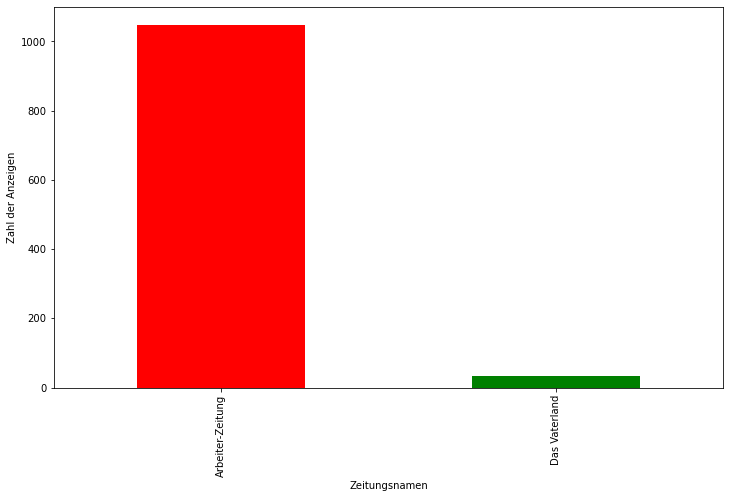

In [17]:
# Visualization of news pub_name and Job advertisement count in the dataset

color_list = list('rgbkymc')
plt.figure(figsize=(12,7))

plt.xlabel("Zeitungsnamen")
plt.ylabel("Zahl der Anzeigen")

df_ground_truth.pub_name.value_counts().plot(kind='bar', color=color_list)

### 3.3. Visualisierung der Länge der Anzeigen

Anzahl der Buchstaben, inklusive Whitespace

<AxesSubplot:xlabel='Anzahl der der Buchstaben inkl. Whitespace', ylabel='Anzahl der Anzeigen'>

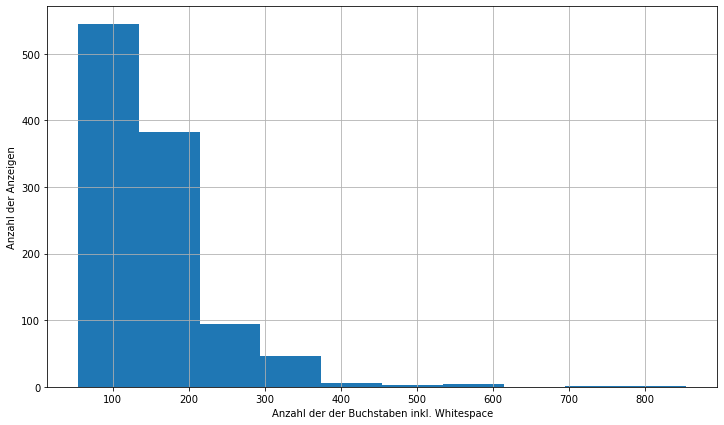

In [18]:
# visualizing job ad length ()

plt.figure(figsize=(12,7))
plt.ylabel("Anzahl der Anzeigen")
plt.xlabel("Anzahl der der Buchstaben inkl. Whitespace")

df_ground_truth['ground_truth_text'].str.len().hist()

#### Anzeige der sehr kurzer Stellenanzeigen
Wie sehen sehr kurze Stellenanzeigen aus.

In [19]:
# count the number of chars in 'ground_truth_text'
df_ground_truth["num_types"] = df_ground_truth['ground_truth_text'].str.len()
# transfer to 'num_types' to int dtype
df_ground_truth["num_types"] = df_ground_truth["num_types"].apply(pd.to_numeric)

/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5420/371458473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ground_truth["num_types"] = df_ground_truth['ground_truth_text'].str.len()
/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5420/371458473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ground_truth["num_types"] = df_ground_truth["num_types"].apply(pd.to_numeric)


In [20]:
df_ground_truth.dtypes

identifier           object
ground_truth_text    object
date                  int64
region_class         object
pub_id               object
pub_name             object
num_types             int64
dtype: object

In [21]:
# filter df_ground_truth, all ads that have 100 or less types
df_ground_truth_short = df_ground_truth[df_ground_truth["num_types"] <= 100]

In [22]:
df_ground_truth_short["ground_truth_text"].iloc[3]

'Monteur 9818\nfür Gas- und Wasserleitung wird auf-\ngenommen. Löbner, II. Schmelzgasse 14.\n'

In [23]:
df_ground_truth_short["ground_truth_text"].iloc[11]

'Näherinnen\nwerden in einer Schneiderei aufge-\nnommen. I. Rotenturmstraße 13,\nTür 10. 3712\n'

In [24]:
df_ground_truth_short["ground_truth_text"].iloc[100]

'Tüchtiger Packer\nvon der Papierbranche wird aufgenom-\nmen. X. Davidgasse 92. 5170\n'

Es scheint, dass auch sehr kurze Anzeigen als normale Stellenanzeige wahrgenommen werden können. Man beachte, dass diese Texte bisher noch nicht bereinigt wurden. 
Grundsätzlich sollten diese Texte im Korpus enthalten bleiben. 

#### Verteilung der Längen der Anzeigen der Stellenangebote

<AxesSubplot:xlabel='Anzahl der der Buchstaben inkl. Whitespace', ylabel='Anzahl der Stellenangebot-Anzeigen'>

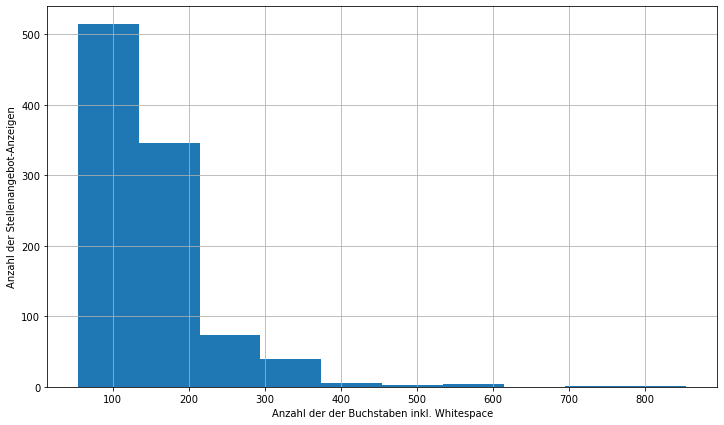

In [25]:
df_offer = df_ground_truth[df_ground_truth.region_class == "OFFER"]

# visualizing offer-ad length ()

plt.figure(figsize=(12,7))
plt.ylabel("Anzahl der Stellenangebot-Anzeigen")
plt.xlabel("Anzahl der der Buchstaben inkl. Whitespace")

df_offer['ground_truth_text'].str.len().hist()

#### Verteilung der Längen der Anzeigen der Stellengesuche

<AxesSubplot:xlabel='Anzahl der der Buchstaben inkl. Whitespace', ylabel='Anzahl der Stellenangebot-Anzeigen'>

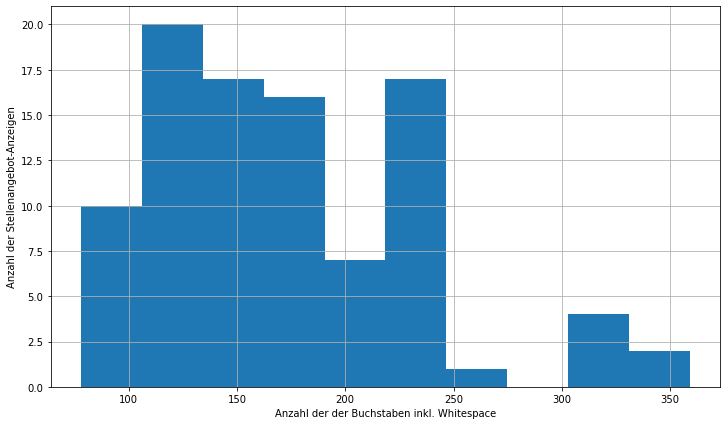

In [26]:
df_offer = df_ground_truth[df_ground_truth.region_class == "SEARCH"]

# visualizing search-ad length ()

plt.figure(figsize=(12,7))
plt.ylabel("Anzahl der Stellenangebot-Anzeigen")
plt.xlabel("Anzahl der der Buchstaben inkl. Whitespace")

df_offer['ground_truth_text'].str.len().hist()

### 3.4. Verteilung der Stellenanzeigen nach Jahr

<AxesSubplot:xlabel='Jahreszahlen der Anzeigen im Gesamtkorpus', ylabel='Anzahl der Anzeigen'>

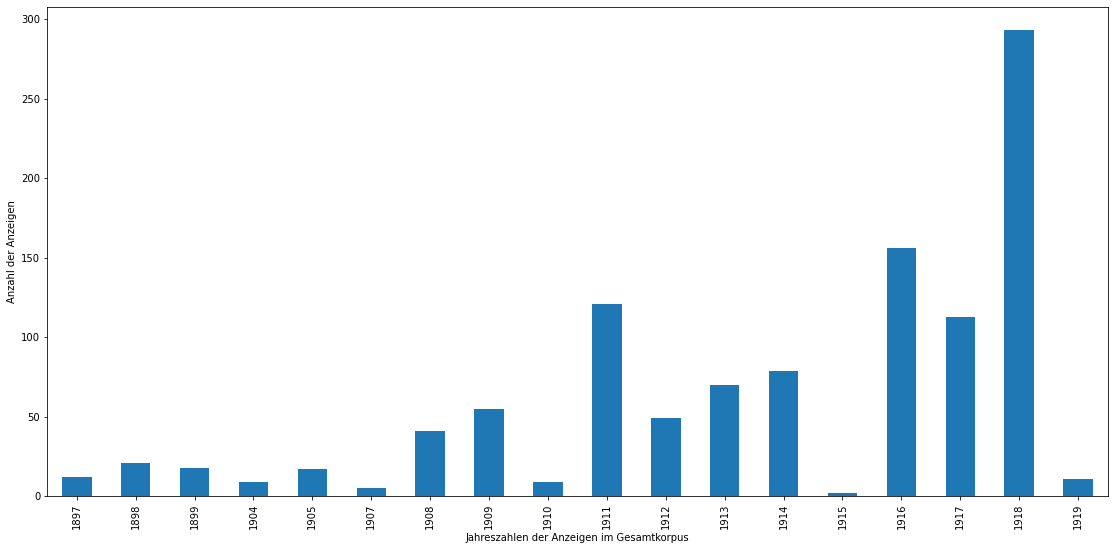

In [27]:
#Visualize numb of jobAds per year
plt.figure(figsize=(19,9))
plt.xlabel("Jahreszahlen der Anzeigen im Gesamtkorpus")
plt.ylabel("Anzahl der Anzeigen")
df_date= df_ground_truth["date"]
df_date.value_counts().sort_index().plot(kind='bar')